**INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY**

**Escuela de Ingeniería y Ciencias - Ingeniería en Ciencia de Datos y Matemáticas**

## Evidencia Final
### Proyecto de aprendizaje supervisado
Modelación del aprendizaje con inteligencia artificial (Gpo 302) - TC2034.302

**Profesora:** Dra. María Valentina Narváez Terán

**Equipo 3**

Annette Pamela Ruiz Abreu - A01423595

Leslie Ramos Gutiérrez - A01562461

Rodrigo González Zermeño - A00572213

Sarah Dorado Romo - A01540946

Monterrey, Nuevo León. 04 de junio de 2023


In [233]:
# Librerías
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import warnings
warnings.filterwarnings("ignore")
import random


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pickle
from mpl_toolkits.mplot3d import Axes3D

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn import metrics 
import missingno as msno


from sklearn.preprocessing import LabelEncoder, MinMaxScaler



Datos: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [234]:
# Cargar datos
raw_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Exploración de datos (crudos)

In [235]:
print("Cantidad de filas:", len(raw_data))
print("Cantidad de columnas:", len(raw_data.columns))

Cantidad de filas: 5110
Cantidad de columnas: 12


In [236]:
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [237]:
raw_data.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [238]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [239]:
raw_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

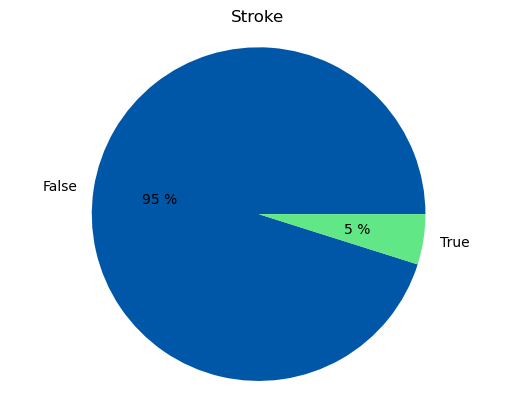

In [240]:
# Exploración de columna de interés (label)

raw_data["stroke"].value_counts()
plt.pie(raw_data["stroke"].value_counts(),labels=["False","True"], autopct="%0.0f %%", colors=["#0057A7", "#61E786"])
plt.axis("equal")
plt.title("Stroke")
plt.show()

In [241]:
raw_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [242]:
for i in raw_data.drop(labels=["id", "age", "avg_glucose_level", "bmi"], axis=1):
    display(pd.DataFrame(raw_data[i].value_counts()))


,gender
Female,2994
Male,2115
Other,1


,hypertension
0,4612
1,498


,heart_disease
0,4834
1,276


,ever_married
Yes,3353
No,1757


,work_type
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


,Residence_type
Urban,2596
Rural,2514


,smoking_status
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


,stroke
0,4861
1,249


## Limpieza de datos

In [243]:
datos = raw_data
no_bmi = datos[datos["bmi"].isna()]

# Como "bmi" es la única columna que tiene datos vacíos, llenaremos esos datos vacíos con la mediana
datos['bmi'].fillna(round (datos['bmi'].median(), 2), inplace=True)
datos = datos.drop("id", axis=1).reset_index(drop=True)

# Eliminamos el dato que no tiene género (dice "Otro")
datos = datos.drop(2970)



In [244]:
# Creación de categorías para la visualización

datos['bmi_category'] = pd.cut(datos['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
datos['age_group'] = pd.cut(datos['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
datos['glucose_category'] = pd.cut(datos['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

datos.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group,glucose_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly,High
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight,Elderly,High
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesity,Elderly,Normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesity,Mid Adults,High
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Ideal,Elderly,High


In [245]:
# Transformación de datos para optimizar memoria

datos["gender"] = datos["gender"].astype("category")
datos["hypertension"] = datos["hypertension"].astype("bool")
datos["heart_disease"] = datos["heart_disease"].astype("bool")
datos["ever_married"] = datos["ever_married"].replace({"Yes":1, "No":0}).astype("bool")
datos["work_type"] = datos["work_type"].astype("category")
datos["Residence_type"] = datos["Residence_type"].astype("category")
datos["smoking_status"] = datos["smoking_status"].astype("category")
datos["stroke"] = datos["stroke"].astype("bool")


## Exploración de datos limpios

In [246]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   category
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   bool    
 3   heart_disease      5109 non-null   bool    
 4   ever_married       5109 non-null   bool    
 5   work_type          5109 non-null   category
 6   Residence_type     5109 non-null   category
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                5109 non-null   float64 
 9   smoking_status     5109 non-null   category
 10  stroke             5109 non-null   bool    
 11  bmi_category       5109 non-null   category
 12  age_group          5109 non-null   category
 13  glucose_category   5109 non-null   category
dtypes: bool(4), category(7), float64(3)
memory usage: 215.8 KB


In [247]:
print("Cantidad de filas:", len(datos))
print("Cantidad de columnas:", len(datos.columns))

Cantidad de filas: 5109
Cantidad de columnas: 14


In [248]:
# Exploración datos cuantitativos
datos.describe()


,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.230769,106.146314,28.863809
std,22.612909,45.287888,7.699272
min,0.080000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [249]:
pd.DataFrame(datos.agg(stat.mode)).rename(columns={0:"mode"})

,mode
gender,Female
age,78.0
hypertension,False
heart_disease,False
ever_married,True
work_type,Private
Residence_type,Urban
avg_glucose_level,93.88
bmi,28.1
smoking_status,never smoked


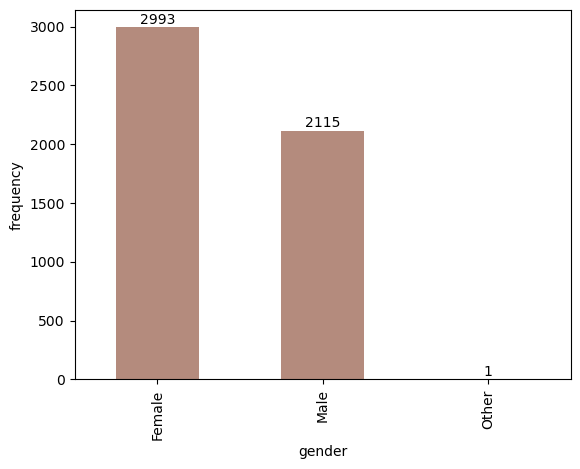

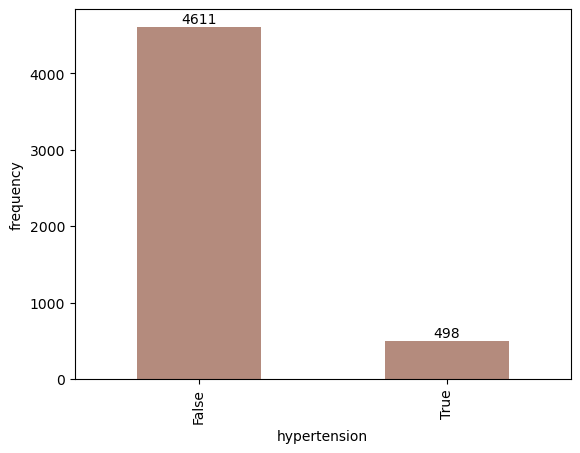

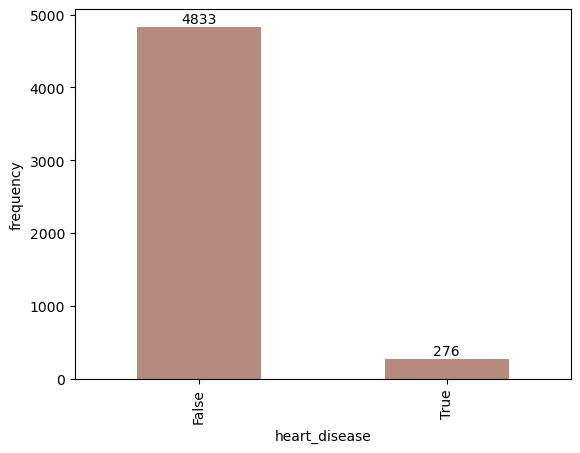

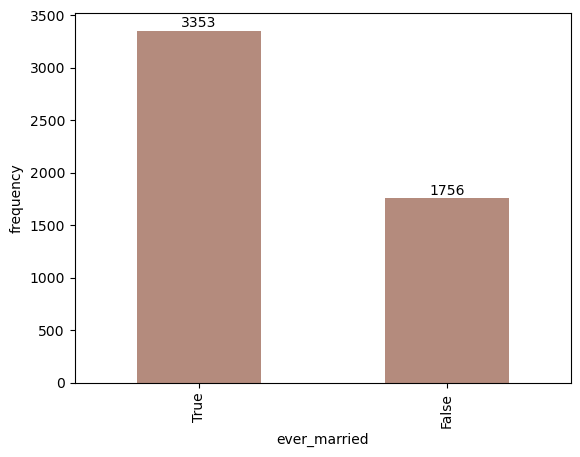

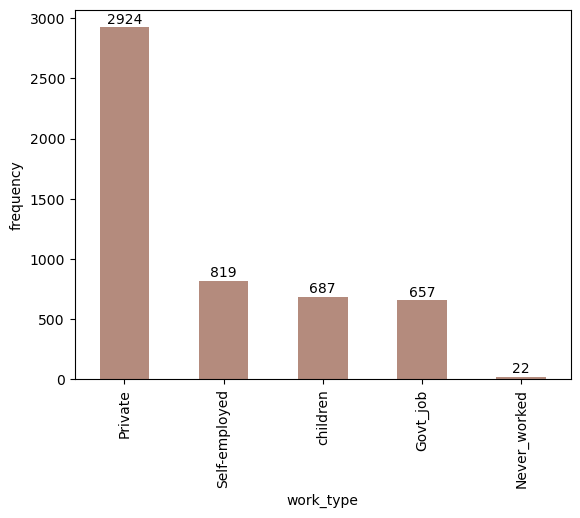

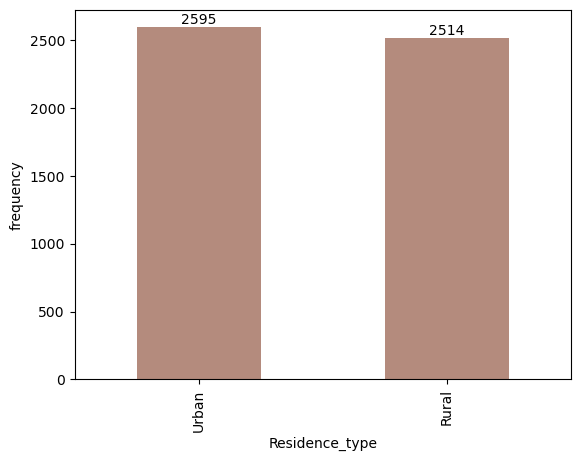

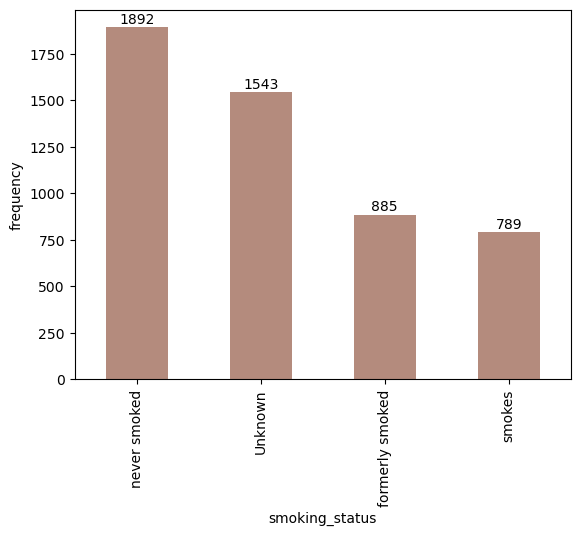

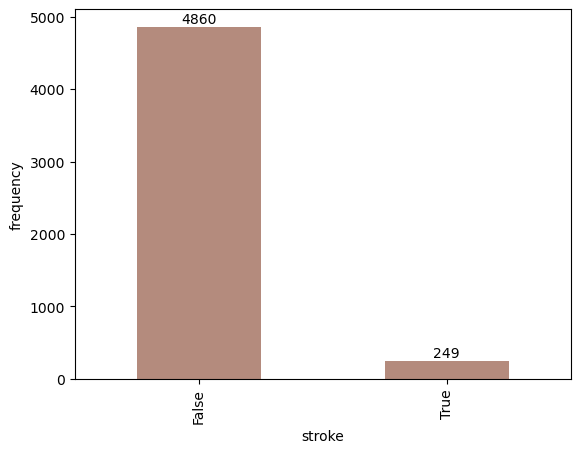

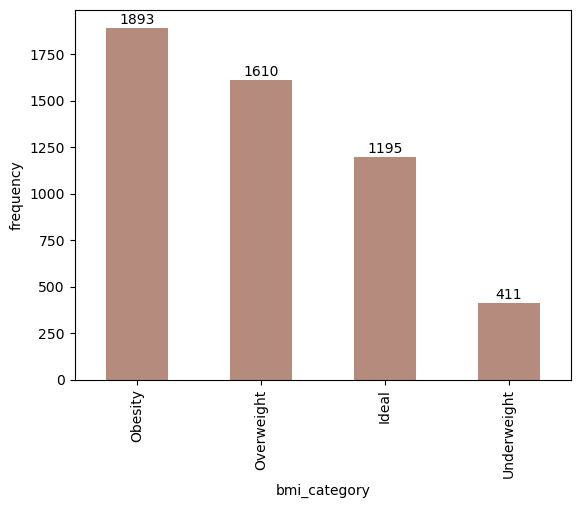

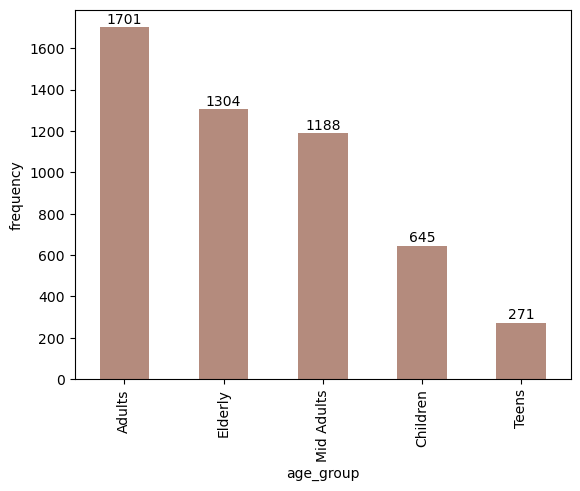

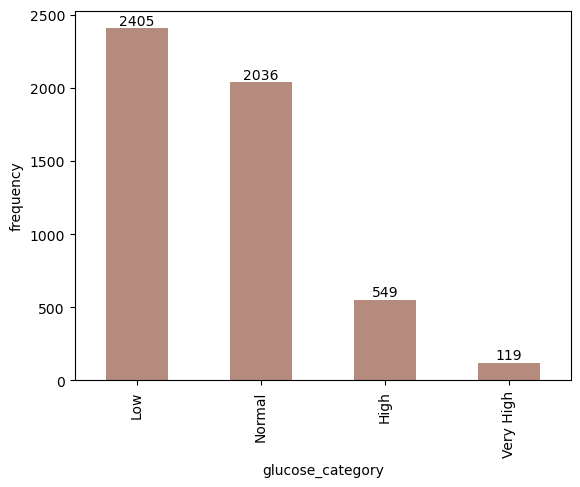

In [250]:
# Exploración variables cualitativas

for i in datos.drop(labels=["age", "avg_glucose_level", "bmi"], axis=1):
    fig = datos[i].value_counts().plot(kind='bar', xlabel=i , ylabel='frequency', color="#B48B7D")
    rects = fig.patches

    # Make some labels.
    labels = [j for j in datos[i].value_counts()]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        fig.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )

    plt.show()
    print("\n\n")


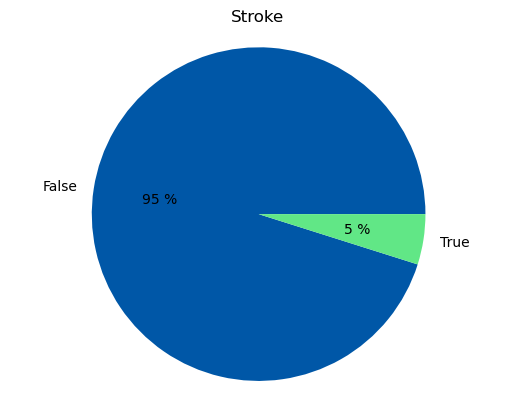

In [251]:
# Exploración de columna de interés (label)
plt.pie(datos["stroke"].value_counts(),labels=["False","True"], autopct="%0.0f %%", colors=["#0057A7", "#61E786"])
plt.axis("equal")
plt.title("Stroke")
plt.show()

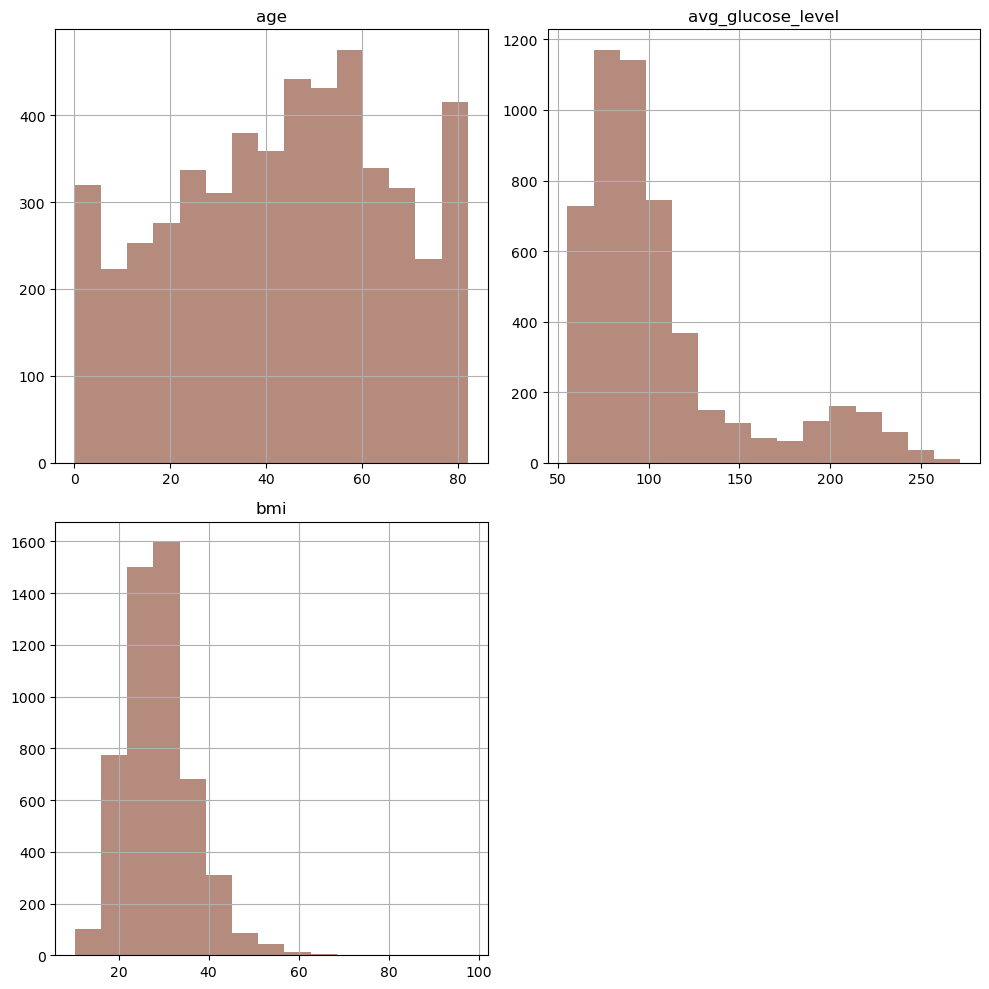

In [252]:
datos.hist(bins=15, figsize=(10,10), color="#B48B7D")
plt.tight_layout()


stroke
age_group  stroke        
Children   False      644
           True         1
Teens      False      270
           True         1
Adults     False     1690
           True        11
Mid Adults False     1129
           True        59
Elderly    False     1127
           True       177

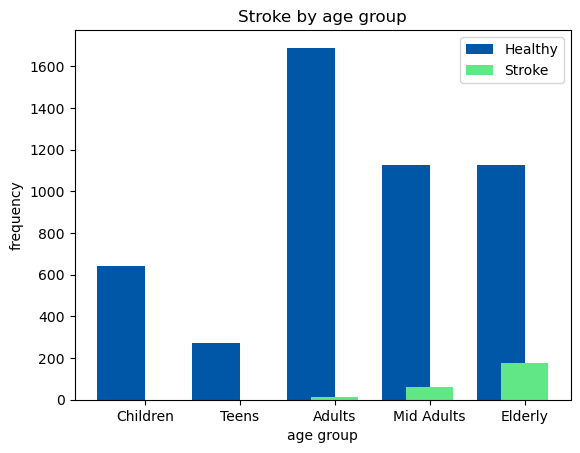

In [253]:
# Análisis de edad

grouped_age = pd.DataFrame(datos.groupby(["age_group"])["stroke"].value_counts())
display(grouped_age)

stroke_age = datos[datos['stroke'] == 1].age_group.value_counts().sort_index(ascending=True)
healthy_age = datos[datos['stroke'] == 0].age_group.value_counts().sort_index(ascending=True)

labels=[" "]+list(stroke_age.index.categories)


x = np.arange(len(stroke_age.values))
width = 0.5


fig, ax = plt.subplots()
ax.bar(x-width/2, healthy_age.values, width, label="Healthy", color="#0057A7")
ax.bar(x, stroke_age.values, width, label="Stroke", color="#61E786")


ax.set_title("Stroke by age group")
ax.set_ylabel("frequency")
ax.set_xlabel("age group")
ax.set_xticklabels(labels)
plt.legend()
plt.show()


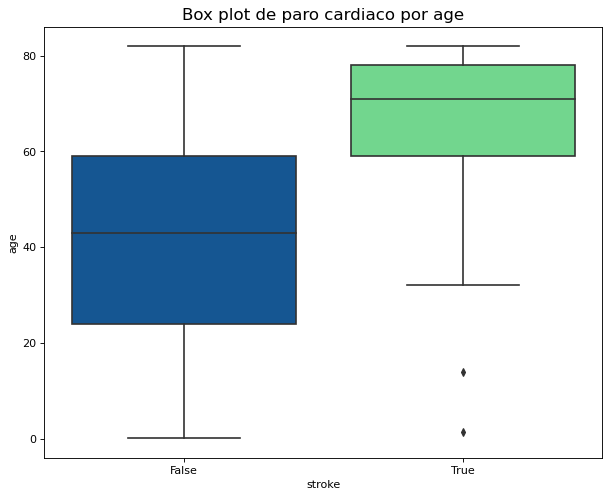

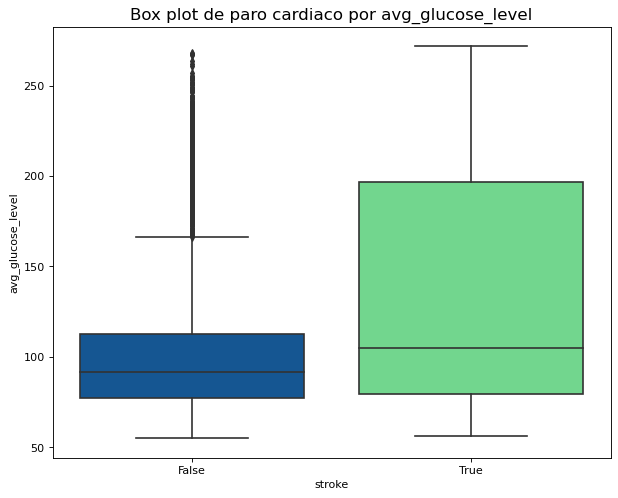

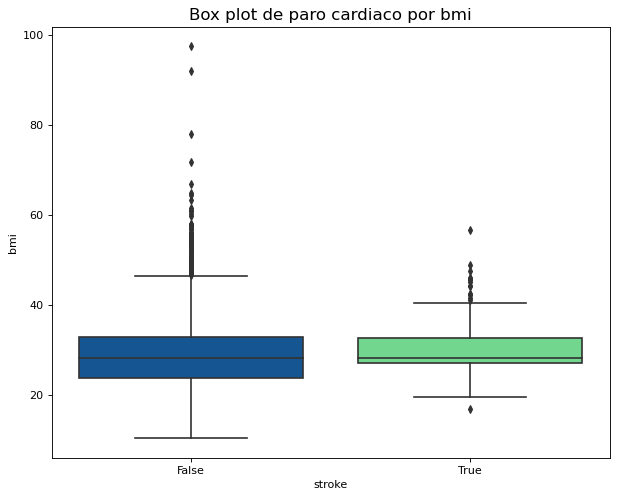

In [254]:
# Boxplots
cuantitativas = ["age", "avg_glucose_level", "bmi"]

for i in cuantitativas:
    plt.figure(figsize=(9,7), dpi= 80)
    sns.boxplot(x='stroke', y=i, data=datos, notch=False, palette=["#0057A7", "#61E786"])
    title = 'Box plot de paro cardiaco por '+i
    plt.title(title, fontsize=15)
    plt.show()



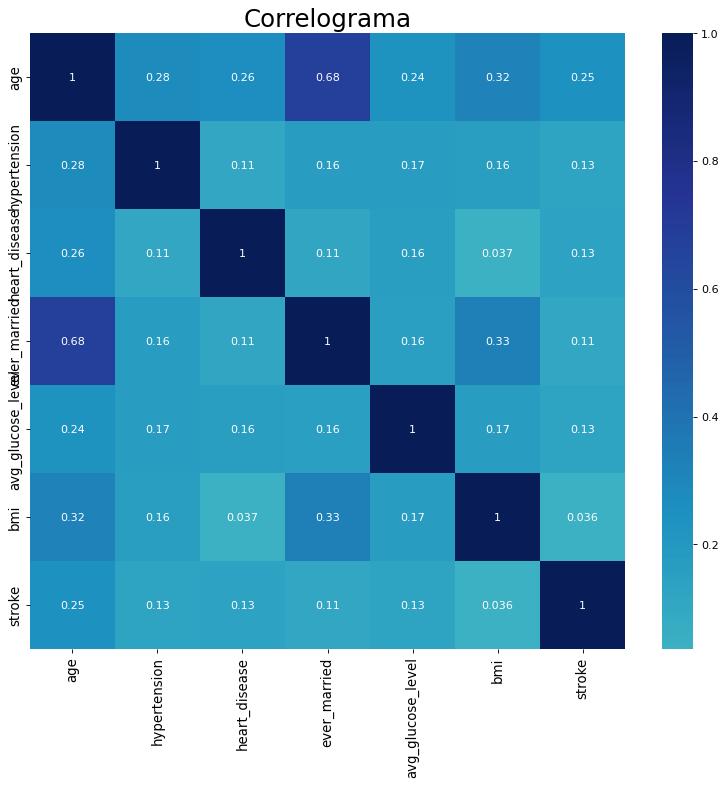

In [255]:
# Gráfica de correlación
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(datos.corr(), xticklabels=datos.corr().columns, yticklabels=datos.corr().columns, center=0, annot=True, cmap="YlGnBu")
plt.title('Correlograma', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Modelos de aprendizaje supervisado

### Clasificación - regresión logística

In [256]:
X = datos.drop(columns=["stroke", "smoking_status", "bmi_category", "age_group", "glucose_category"])
y = datos["stroke"]

In [257]:
label_encoder = LabelEncoder()
labels = {}

for i in X:
    if isinstance(X[i][0],str):
        X[i] = label_encoder.fit_transform(datos[i])
        labels[i]=label_encoder.classes_

X.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,1,67.0,False,True,True,2,1,228.69,36.6
1,0,61.0,False,False,True,3,0,202.21,28.1
2,1,80.0,False,True,True,2,0,105.92,32.5
3,0,49.0,False,False,True,2,1,171.23,34.4
4,0,79.0,True,False,True,3,0,174.12,24.0


In [258]:
random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)

In [259]:
logreg = LogisticRegression(solver="liblinear", max_iter=1000) #class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [260]:
pd.DataFrame(logreg.coef_, columns=X.columns, index=["Coefficients"]).transpose()


,Coefficients
gender,-0.307534
age,0.057010
hypertension,0.463543
heart_disease,0.444844
ever_married,-0.613445
work_type,-0.101039
Residence_type,0.067571
avg_glucose_level,0.003688
bmi,-0.029480


In [261]:
pd.DataFrame([logreg.intercept_], columns =["Intercept"])


,Intercept
0,-4.962415


In [262]:
predictions = logreg.predict(X_test)
print(f"Accuracy on test set: {round(logreg.score(X_test,y_test),2)}")

Accuracy on test set: 0.95


In [263]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

       False       0.95      1.00      0.97      2429
        True       0.50      0.01      0.02       126

    accuracy                           0.95      2555
   macro avg       0.73      0.50      0.50      2555
weighted avg       0.93      0.95      0.93      2555



### Árbol de decisión

### SVM

### K-nearest neighbor